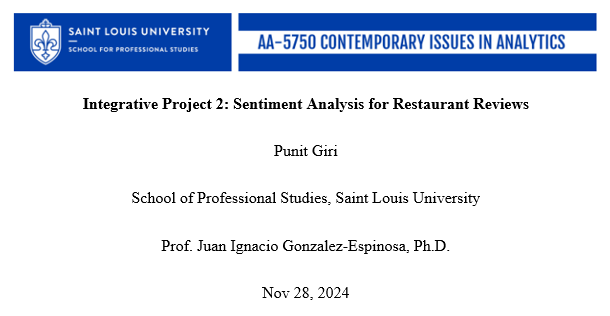

**1. Problem Definition and Setup**

 **Defining the problem and setting up the environment:**

In [2]:
pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/sentimental_analysis/Restaurant_Reviews.csv')


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Data Exploration**

**Understand the basic properties of the data:**

---



In [6]:
# Check for missing values
data.isnull().sum()

,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0


In [7]:
data.head()

,Review,Rating,Metadata,Time,Pictures
0,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [8]:
# Basic statistics of the dataset
data.describe()

,Rating,Pictures
count,9950.000000,9950.000000
mean,3.600402,0.752261
std,1.483558,2.576292
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


**3. Exploratory Data Analysis (EDA)**

**Visualize the data to gain insights:**

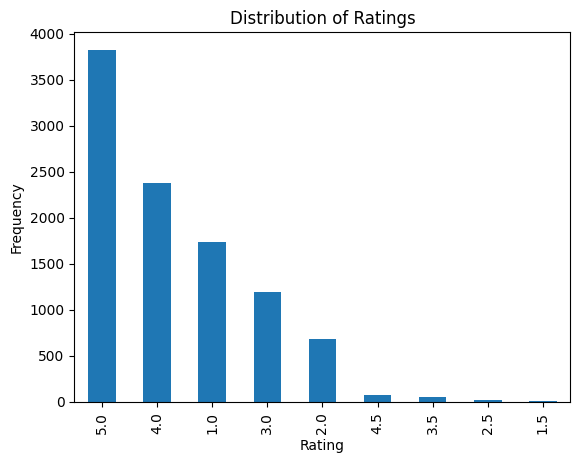

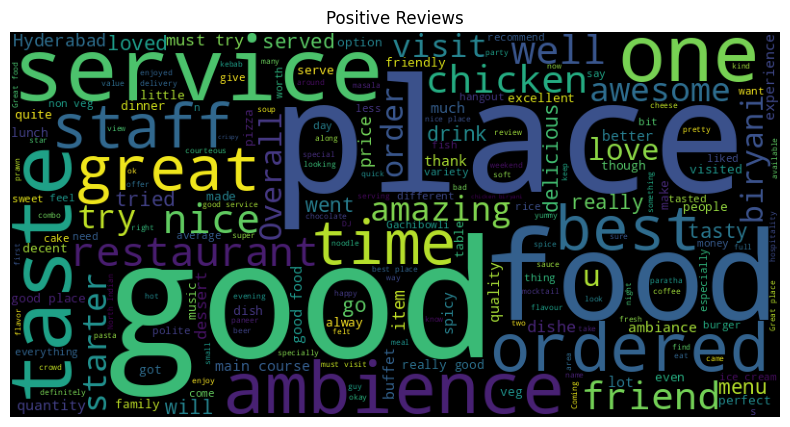

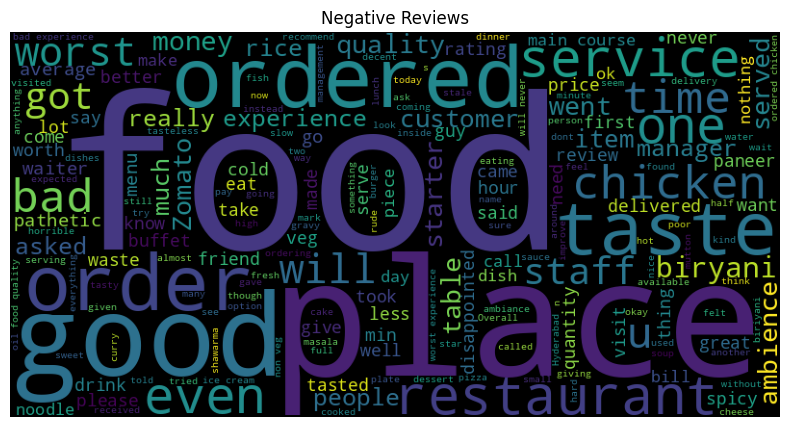

In [9]:
# Distribution of reviews
data['Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Generate word clouds for positive and negative sentiments
positive_reviews = data[data['Rating'] >= 3]['Review'].str.cat(sep=' ')
negative_reviews = data[data['Rating'] < 3]['Review'].str.cat(sep=' ')

pos_wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)
neg_wordcloud = WordCloud(width=800, height=400).generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.title('Positive Reviews')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.title('Negative Reviews')
plt.show()


In [10]:
#Droping the unnecessary columns
data.drop(data[["Time",'Pictures']],axis=1,inplace=True)


In [11]:

data.drop('Metadata',axis=1,inplace=True)


In [12]:
#shape of the data
data.shape

(9950, 2)

**4. Data Preprocessing**

**Clean and preprocess text data for analysis:**

In [13]:
import nltk
nltk.download('punkt', download_dir='/usr/local/share/nltk_data')
nltk.download('stopwords', download_dir='/usr/local/share/nltk_data')
nltk.download('wordnet', download_dir='/usr/local/share/nltk_data')


[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...


True

In [14]:
import nltk
nltk.download('punkt_tab')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Re-download NLTK resources
nltk.download('punkt', force=True)
nltk.download('wordnet', force=True)
nltk.download('stopwords', force=True)

# Function to clean text
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # remove HTML tags
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()  # convert to lowercase
    tokens = word_tokenize(text)  # tokenize
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens if word not in set(stopwords.words('english'))]  # lemmatize and remove stopwords
    return ' '.join(tokens)

# Apply the cleaning function
data['Cleaned_Review'] = data['Review'].apply(clean_text)
data.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,Rating,Cleaned_Review
0,"The ambience was good, food was quite good . h...",5.0,ambience good food quite good saturday lunch c...
1,Ambience is too good for a pleasant evening. S...,5.0,ambience good pleasant evening service prompt ...
2,A must try.. great food great ambience. Thnx f...,5.0,must try great food great ambience thnx servic...
3,Soumen das and Arun was a great guy. Only beca...,5.0,soumen da arun great guy behavior sincerety go...
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,food goodwe ordered kodi drumstick basket mutt...


**5. Sentiment Analysis**

**Implement sentiment analysis using TextBlob and VADER:**

In [15]:
# Function to get TextBlob sentiment
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Function to get VADER sentiment
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment analysis
data['TextBlob_Sentiment'] = data['Cleaned_Review'].apply(get_textblob_sentiment)
data['VADER_Sentiment'] = data['Cleaned_Review'].apply(get_vader_sentiment)

# Classify based on sentiment
data['TextBlob_Analysis'] = data['TextBlob_Sentiment'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
data['VADER_Analysis'] = data['VADER_Sentiment'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
print(data[['Review', 'TextBlob_Analysis', 'VADER_Analysis']].head())


                                              Review TextBlob_Analysis  \
0  The ambience was good, food was quite good . h...          Positive   
1  Ambience is too good for a pleasant evening. S...          Positive   
2  A must try.. great food great ambience. Thnx f...          Positive   
3  Soumen das and Arun was a great guy. Only beca...          Positive   
4  Food is good.we ordered Kodi drumsticks and ba...          Positive   

  VADER_Analysis  
0       Positive  
1       Positive  
2       Positive  
3       Positive  
4       Positive  




**6. Model Evaluation-**

**Evaluate and compare both models:**



In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Actual labels based on the rating
data['Actual'] = data['Rating'].apply(lambda x: 'Positive' if x >= 3 else 'Negative')

# Evaluate TextBlob
print("TextBlob Model Evaluation")
print(classification_report(data['Actual'], data['TextBlob_Analysis']))
print(confusion_matrix(data['Actual'], data['TextBlob_Analysis']))

# Evaluate VADER
print("VADER Model Evaluation")
print(classification_report(data['Actual'], data['VADER_Analysis']))
print(confusion_matrix(data['Actual'], data['VADER_Analysis']))


TextBlob Model Evaluation
              precision    recall  f1-score   support

    Negative       0.78      0.58      0.67      2446
    Positive       0.87      0.95      0.91      7504

    accuracy                           0.86      9950
   macro avg       0.83      0.76      0.79      9950
weighted avg       0.85      0.86      0.85      9950

[[1424 1022]
 [ 409 7095]]
VADER Model Evaluation
              precision    recall  f1-score   support

    Negative       0.88      0.50      0.64      2446
    Positive       0.86      0.98      0.91      7504

    accuracy                           0.86      9950
   macro avg       0.87      0.74      0.78      9950
weighted avg       0.86      0.86      0.85      9950

[[1224 1222]
 [ 172 7332]]


**7. Conclusion**

**Draw conclusions based on the model evaluations and recommend the best sentiment analysis model:**

This analysis sought to establish the effectiveness of both TextBlob and VADER techniques in handling restaurant review dataset. As the evaluation metrics of the models has observed it, both models have their advantages and limitations.


**Performance Metrics**

The performance of both the models was in parity to each other, and the final evaluation of the two models yielded an overall accuracy of 86% thus indicating that the percentage of the reviews correctly concluded as either positive or negative was almost the same. However, a closer look at precision, recall, and F1-scores reveals nuances in their performance:


**TextBlob:**

Precision: On negative review, the model recorded 0.78 while under positive reviews, the model recorded 0.87. This will mean a higher rate of driving correct identification of the positive reviews on the products. Recall: For negative reviews it got score of 0.58 and for positive reviews the score was 0.95. This is an indication that there is a better capacity of capturing most of the real positive reviews but more failure in capturing a big set of negative ones. F1-score: It scores 0.67 of negative and 0.91 for positive reviews, which shows that for positive reviews it gives a fairly good result, but for negative reviews much less.


**VADER:**

Precision: It got 0.88 for negative reviews, 0.86 for positive reviews which asserts its capability to correctly classify negative reviews fear better than the TextBlob.
Recall: For negative reviews, the model scored 0.50 and for positive reviews, the model scored 0.98. This implies a higher capability of identifying most of the real positive sentiments akin to TextBlob but losing approximately half of the real negative sentiments.
F1-score: It got 0.64 for negative and 0.91 for positive and it seems more efficient for positive review but less efficient when it comes to negative reviews like TextBlob.


**Analysis**

Surprisingly, for all sets of data, the discriminant function scores of the two models were equally accurate even though the first model was more robust in terms of the number of important variables it identified. TextBlob had a higher precision value for positive review suggesting that it labels few actual negative reviews as positive. Surprisingly, VADER had a greater accuracy for negative reviews implying the model’s increased capability to accurately predict negative sentiments. Getting higher recall score towards positive reviews mean that VADER can easily differentiate and classify correct positive cases better than TextBlob. The results also show that the higher recall score means the model is more appropriate for capturing the most reviews that are connected to the corresponding classes, making it ideal for specific sentiment analysis uses.

**Recommendation**

However, according to the number and quality of the evaluation metrics, for overall sentiment analysis, TextBlob is somewhat advised. For overall sentiment analysis, textblob is somewhat recommended. This is due to higher precision in particular for positive sentiments being highly beneficial for tasks where elimination of false positive results is necessary. However, if the application demands a finer way of identifying the negative sentiments then VADER could be the way to go.


In [17]:
# prompt: give me the code to convert this notebook to html file

!jupyter nbconvert --to html /content/drive/MyDrive/sentimental_analysis/Sentiment_analysis1.ipynb
# Replace 'your_notebook_name.ipynb' with the actual name of your notebook file.


[NbConvertApp] Converting notebook /content/drive/MyDrive/sentimental_analysis/Sentiment_analysis1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 1086831 bytes to /content/drive/MyDrive/sentimental_analysis/Sentiment_analysis1.html
